# Ein MLP auf dem MNIST Datensatz trainieren

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

2024-10-27 05:43:54.125325: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-27 05:43:55.415422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/juebrauer/miniconda3/envs/env_ss24/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-10-27 05:43:57.323817: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more a

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8775 - loss: 0.4310
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9636 - loss: 0.1224
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0804
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9832 - loss: 0.0566
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0428
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.9771 - loss: 0.0798


[0.07001379877328873, 0.9786999821662903]

# Anzahl und Form der Daten verstehen

In [2]:
# RTTI = RunTime Type Information
type(x_train)

numpy.ndarray

In [3]:
x_train.ndim

3

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Ein Bild mit dem MLP klassifizieren

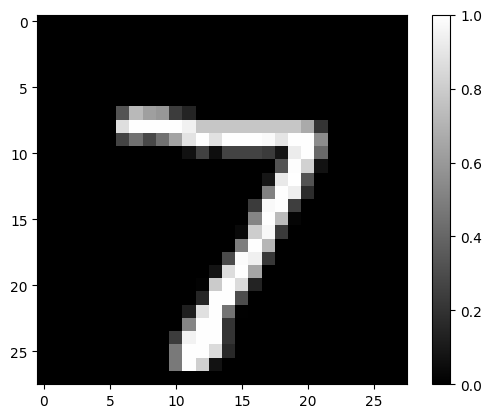

In [7]:
import matplotlib.pyplot as plt
plt.imshow( x_test[0,:,:], cmap="gray" )
plt.colorbar()
plt.show()

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
x_test[0,:,:].ndim

2

In [10]:
x_test[0,:,:].shape

(28, 28)

In [11]:
x_test[0,:,:].reshape(1, 28, 28).shape

(1, 28, 28)

In [12]:
img = x_test[0,:,:].reshape(1, 28, 28)
preds = model.predict( img ).flatten()
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([4.2360696e-08, 1.8226572e-09, 1.6551878e-05, 6.5368589e-04,
       1.7577748e-12, 3.8953635e-06, 2.1465370e-10, 9.9931955e-01,
       1.1659940e-06, 5.1652255e-06], dtype=float32)

In [13]:
img = x_test[0,:,:].reshape(1, 28, 28)
preds = model.predict( img ).flatten()

import numpy
label = numpy.argmax(preds)
print(f"Das MLP 'sieht' hier eine {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Das MLP 'sieht' hier eine 7


# Mehrere Testbilder durch das MLP laufen lassen

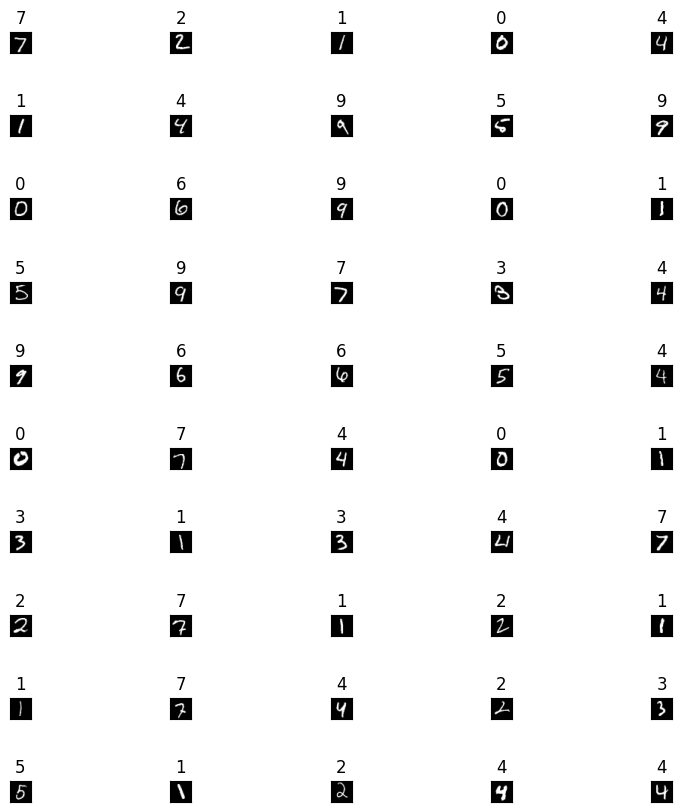

In [24]:
import numpy
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for img_id in range(0,50):

    img = x_test[img_id,:,:].reshape(1, 28, 28)
    preds = model.predict( img, verbose=0 ).flatten()
    label = numpy.argmax(preds)

    plt.subplot(10,5, img_id+1)
    plt.imshow( x_test[img_id,:,:], cmap="gray" )
    plt.title(f"{label}")
    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(hspace=3)
plt.show()

# Wie robust ist das MLP gegenüber Rauschen?

In [43]:
N = 28*28
img2 = numpy.zeros(N)
pixel_ids_noise = numpy.random.permutation(N)[:5]
img2[ pixel_ids_noise ] = 1
img2 = img2.reshape(28,28)
img2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

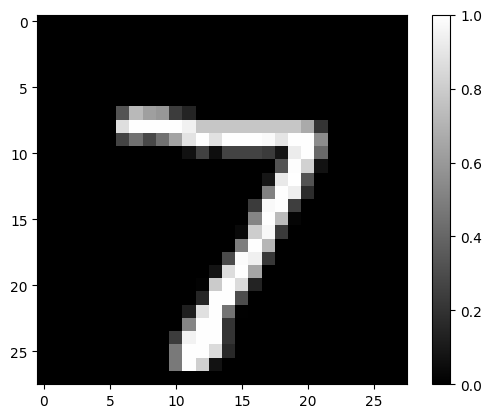

In [26]:
img = x_test[0,:,:].reshape(28,28)
img2 = img.flatten()

plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()

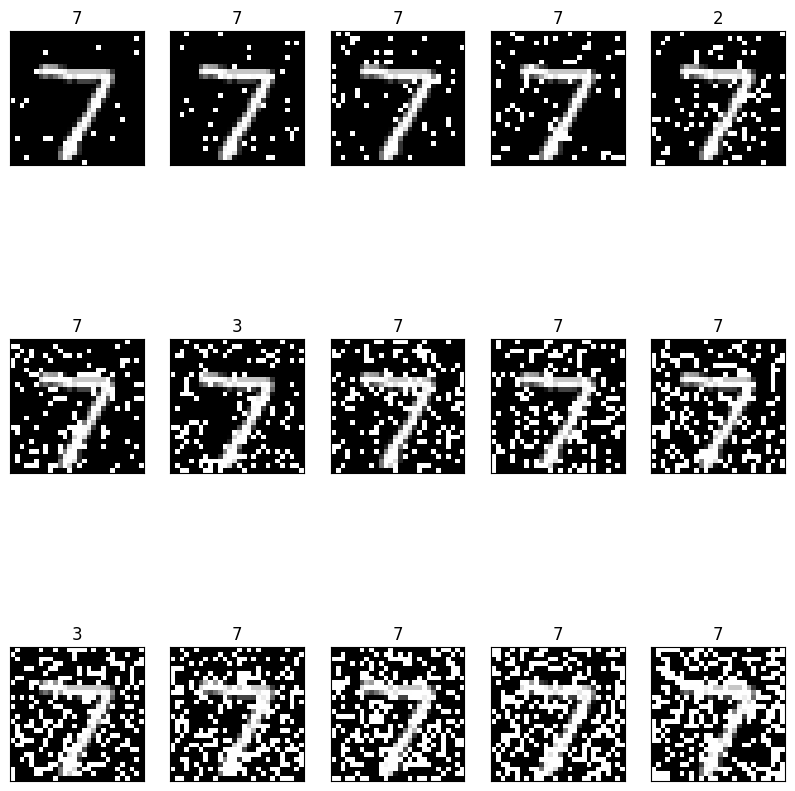

In [47]:
img = x_test[0,:,:].reshape(28,28)
img = img.flatten()
N = 28*28

plt.figure(figsize=(10,10))

for noise_level in range(1,16):
    # Ein Bild mit Rauschen vorbereiten
    pixel_ids_noise = numpy.random.permutation(N)[:noise_level*20]
    img2 = img.copy()
    img2[ pixel_ids_noise ] = 1
    img2 = img2.reshape(1,28,28)

    # Das Bild vom MLP klassifizieren lassen
    preds = model.predict( img2, verbose=0 ).flatten()
    pred_label = numpy.argmax(preds)

    # Bild + Klassifikationsergebnis anzeigen
    plt.subplot(3,5, noise_level)
    plt.imshow( img2[0,:,:], cmap="gray" )
    plt.title(f"{pred_label}")
    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(hspace=1)
plt.show()

# Modell evaluieren "per Hand"

In [2]:
nr_tests = x_test.shape[0]
nr_tests

10000

In [16]:
x_test.shape

(10000, 28, 28)

In [15]:
import numpy

nr_tests = x_test.shape[0]

correct = 0

# predict the class
preds = model.predict( x_test, verbose=0)

for test_nr in range(nr_tests):
    
    # identify the class
    pred_label = numpy.argmax(preds[test_nr])
    
    # get the ground truth label
    gt_label = y_test[test_nr]
    
    # compare predicted and actual class
    if pred_label == gt_label:
        correct += 1

correct_percent = (correct/nr_tests)*100
print(f"Correct: {correct} ({correct_percent:.2f}%) Total: {nr_tests}")

Correct: 9787 (97.87%) Total: 10000


In [10]:
preds.shape

(10000, 10)

In [14]:
preds[-1]

array([2.5133959e-10, 1.8206499e-10, 9.9169677e-09, 1.5917523e-11,
       2.4197202e-06, 8.0045680e-08, 9.9999744e-01, 1.6168843e-14,
       2.4959514e-12, 7.0705529e-13], dtype=float32)

# Modell speichern mit `pickle`

In [17]:
type(model)

keras.src.models.sequential.Sequential

In [18]:
import pickle
f = open("mlp_mnist_classificator.pkl", mode="wb") # w for write, b for binary
pickle.dump(model, f)
f.close()

# Modell wiederherstellen mit `pickle`

In [19]:
import pickle
f = open("mlp_mnist_classificator.pkl", mode="rb") # r for read, b for binary
model2 = pickle.load(f)
f.close()

In [20]:
type(model2)

keras.src.models.sequential.Sequential

# Modell speichern mit Keras

In [22]:
model.save("mlp_mnist_classificator_keras.keras")

# Modell wiederherstellen mit Keras

In [24]:
from tensorflow.keras.models import load_model
model3 = load_model("mlp_mnist_classificator_keras.keras")

In [25]:
type(model3)

keras.src.models.sequential.Sequential

In [26]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [27]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [28]:
import tensorflow
tensorflow.__version__

'2.16.1'